In [15]:
import pandas as pd
pd.set_option('display.max_columns', 500)
df = pd.read_csv('../data/data_jan_listings.csv')

In [16]:
df

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200109061902,2020-01-10,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,NaN,NaN,https://a0.muscache.com/im/pictures/1d720898-c...,NaN,43039,https://www.airbnb.com/users/show/43039,Adriano,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,NaN,t,https://a0.muscache.com/im/pictures/user/47773...,https://a0.muscache.com/im/pictures/user/47773...,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"London, United Kingdom",Brixton,Lambeth,NaN,London,NaN,SW9 8DG,London,"London, United Kingdom",GB,United Kingdom,51.462250,-0.117320,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",NaN,$88.00,$645.00,"$2,350.00",$400.00,$30.00,2,$25.00,2,180,2,2,180,180,2.0,180.0,5 days ago,t,17,42,72,344,2020-01-10,186,3,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.56
1,13913,https://www.airbnb.com/rooms/13913,20200109061902,2020-01-10,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,NaN,NaN,https://a0.muscache.com/im/pictures/ffb507b7-9...,NaN,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,NaN,f,ht

In [5]:
df.shape

(87235, 106)

In [6]:
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,11551,https://www.airbnb.com/rooms/11551,20200109061902,2020-01-10,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,...,t,f,strict_14_with_grace_period,f,t,2,2,0,0,1.56
1,13913,https://www.airbnb.com/rooms/13913,20200109061902,2020-01-10,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,...,f,f,moderate,f,f,2,1,1,0,0.17
2,15400,https://www.airbnb.com/rooms/15400,20200109061902,2020-01-10,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,...,t,f,strict_14_with_grace_period,t,t,1,1,0,0,0.72
3,17402,https://www.airbnb.com/rooms/17402,20200109061902,2020-01-10,Superb 3-Bed/2 Bath & Wifi: Trendy W1,You'll have a wonderful stay in this superb mo...,"This is a wonderful very popular beautiful, sp...",You'll have a wonderful stay in this superb mo...,none,"Location, location, location! You won't find b...",...,t,f,strict_14_with_grace_period,f,f,15,15,0,0,0.39
4,17506,https://www.airbnb.com/rooms/17506,20200109061902,2020-01-10,Boutique Chelsea/Fulham Double bed 5-star ensuite,Enjoy a chic stay in this elegant but fully mo...,Enjoy a boutique London townhouse bed and brea...,Enjoy a chic stay in this elegant but fully mo...,business,Fulham is 'villagey' and residential – a real ...,...,f,f,strict_14_with_grace_period,f,f,2,0,2,0,NaN


## Function to get only relevant columns and where target variable is populated

In [20]:
def get_data(file, nrows=None):
    if file == 'data_jan_listings':
        cols = [ 'id',
                 'name',
                 'summary',
                 'space',
                 'description',
                 'experiences_offered',
                 'neighborhood_overview',
                 'notes',
                 'transit',
                 'access',
                 'interaction',
                 'house_rules',
                 'host_since',
                 'host_location',
                 'host_about',
                 'host_response_time',
                 'host_response_rate',
                 'host_neighbourhood',
                 'host_listings_count',
                 'host_total_listings_count',
                 'host_verifications',
                 'host_identity_verified',
                 'street',
                 'neighbourhood_cleansed',
                 'zipcode',
                 'latitude',
                 'longitude',
                 'is_location_exact',
                 'property_type',
                 'room_type',
                 'accommodates',
                 'bathrooms',
                 'bedrooms',
                 'beds',
                 'bed_type',
                 'amenities',
                 'price',
                 'weekly_price',
                 'monthly_price',
                 'security_deposit',
                 'cleaning_fee',
                 'guests_included',
                 'extra_people',
                 'minimum_nights',
                 'maximum_nights',
                 'availability_30',
                 'availability_60',
                 'availability_90',
                 'availability_365',
                 'number_of_reviews',
                 'number_of_reviews_ltm',
                 'first_review',
                 'last_review',
                 'review_scores_rating',
                 'review_scores_accuracy',
                 'review_scores_cleanliness',
                 'review_scores_checkin',
                 'review_scores_communication',
                 'review_scores_location',
                 'review_scores_value',
                 'instant_bookable',
                 'cancellation_policy',
                 'require_guest_profile_picture',
                 'require_guest_phone_verification',
                 'reviews_per_month']
        dates = ['host_since', 'first_review', 'last_review']
        pd.set_option('display.max_columns', 500)
        data = pd.read_csv('../data/data_jan_listings.csv', low_memory=False, parse_dates=dates, usecols=cols,
                           index_col='id', nrows=nrows)
    return data[data['review_scores_rating'].notna()]

In [21]:
data = get_data('data_jan_listings')

In [22]:
data.shape

(65408, 64)

In [23]:
data.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood_cleansed,zipcode,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11551,Arty and Bright London Apartment in Zone 2,Unlike most rental apartments out there my fla...,"Amenities Bedding: 1 Double bed, 1 living room...",Unlike most rental apartments out there my fla...,family,Not even 10 minutes by metro from Victoria Sta...,No Smoking (very strict) Check-in time is afte...,Tons of buses (24hrs) go into central London f...,Guest will have access to the entire apartment,No interaction with guests as you book the ent...,No Smoking (very strict) No pets are allowed i...,2009-10-03,"London, England, United Kingdom","Hello, I'm a friendly Italian man with a very ...",within an hour,100%,Brixton,3.0,3.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,"London, United Kingdom",Lambeth,SW9 8DG,51.46225,-0.11732,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Paid par...",$88.00,$645.00,"$2,350.00",$400.00,$30.00,2,$25.00,2,180,17,42,72,344,186,3,2010-03-21,2019-11-17,92.0,9.0,9.0,10.0,10.0,9.0,9.0,t,strict_14_with_grace_period,f,t,1.56
13913,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,"Hello Everyone, I'm offering my lovely double ...",My bright double bedroom with a large window h...,business,Finsbury Park is a friendly melting pot commun...,For art lovers I can give guest my Tate Member...,The flat only a 10 minute walk to Finsbury Par...,Guest will have access to the self catering ki...,I like to have little chats with my guest over...,I'm an artist and have my artwork up on the wa...,2009-11-16,"London, England, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,70%,LB of Islington,4.0,4.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,"Islington, Greater London, United Kingdom",Islington,N4 3,51.56802,-0.11121,t,Apartment,Private room,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",$65.00,$333.00,"$1,176.00",$100.00,$15.00,1,$15.00,1,29,30,60,90,365,20,6,2010-08-18,2019-11-25,97.0,10.0,10.0,10.0,10.0,9.0,9.0,f,moderate,f,f,0.17
15400,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,Bright Chelsea Apartment This is a bright one...,Lots of windows and light. St Luke's Gardens ...,romantic,It is Chelsea.,The building next door is in the process of be...,The underground stations are South Kensington ...,There are two wardrobes for guests exclusive u...,If I am in the country I like to welcome my gu...,NO SMOKING PLEASE.. No unauthorised guests. No...,2009-12-05,"Kensington, England, United Kingdom","English, grandmother, I have travelled quite ...",within a few hours,100%,Chelsea,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,"London, United Kingdom",Kensington and Chelsea,SW3,51.48796,-0.16898,t,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$100.00,$600.00,"$2,250.00",$150.00,$50.00,2,$0.00,10,50,17,

In [42]:
fixed_feats = data[['host_since', 'host_location', 'host_neighbourhood',
                    'street', 'neighbourhood_cleansed', 'zipcode',
                    'latitude', 'longitude', 'property_type', 'room_type',
                    'bathrooms', 'bedrooms', 'number_of_reviews']]

In [41]:
review_feats = data[['number_of_reviews', 'number_of_reviews_ltm',
                     'first_review', 'last_review', 'review_scores_accuracy',
                     'review_scores_checkin', 'review_scores_cleanliness',
                     'review_scores_communication', 'review_scores_location',
                     'review_scores_value', 'reviews_per_month']]

In [34]:
flex_feats = data.drop(columns = fixed_feats + review_feats)

In [40]:
data.shape

(65408, 64)

In [38]:
fixed_feats.shape

(65408, 13)

In [39]:
review_feats.shape

(65408, 11)

In [36]:
flex_feats.shape

(65408, 41)

In [91]:
neigh_reviews = data.groupby('neighbourhood_cleansed')\
    .agg({'review_scores_rating': 'mean'})\
    .sort_values('review_scores_rating', ascending=False)\
    .reset_index()

In [75]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [72]:
borough_path = '../data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp'

In [73]:
map_df = gpd.read_file(borough_path)

<AxesSubplot:>

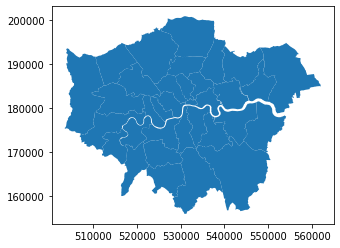

In [83]:
map_df.plot()

In [96]:
merged_geo = map_df.set_index('NAME').join(neigh_reviews.set_index('neighbourhood_cleansed'))

In [114]:
neigh_reviews.head(10)

,neighbourhood_cleansed,review_scores_rating
0,Kingston upon Thames,95.453659
1,Merton,94.959835
2,Richmond upon Thames,94.893688
3,Hackney,94.214792
4,Havering,94.172414
5,Wandsworth,94.085133
6,Sutton,94.027397
7,Lewisham,93.972556
8,Haringey,93.935269
9,Lambeth,93.905961


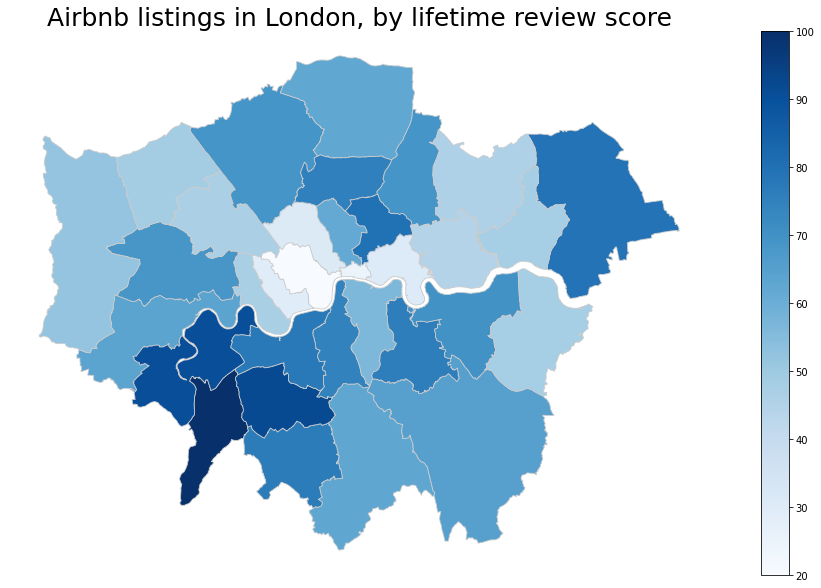

In [112]:
# set a variable that will call whatever column we want to visualise on the map
variable = 'review_scores_rating'
# set the range for the choropleth
vmin, vmax = 20, 100
# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(18, 10))

merged_geo.plot(column=variable, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
ax.axis('off')
ax.set_title('Airbnb listings in London, by lifetime review score', fontdict={'fontsize': 25, 'fontweight' : 3})
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)